In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
milk = pd.read_csv("/Users/darshmac/Documents/cdac/For DBDA/Advance Analytics/Datasets/milk.csv",index_col=0)
milk

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10
CAMEL,87.7,3.5,3.4,4.8,0.71
BISON,86.9,4.8,1.7,5.7,0.90
BUFFALO,82.1,5.9,7.9,4.7,0.78
GUINEA PIG,81.9,7.4,7.2,2.7,0.85


In [3]:
milk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, HORSE to DOLPHIN
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   water    25 non-null     float64
 1   protein  25 non-null     float64
 2   fat      25 non-null     float64
 3   lactose  25 non-null     float64
 4   ash      25 non-null     float64
dtypes: float64(5)
memory usage: 1.2+ KB


In [4]:
scaler = StandardScaler()
milkscaled=scaler.fit_transform(milk)

In [5]:
clust = KMeans(n_clusters=3)
clust.fit(milkscaled)
print(clust.labels_)

print(silhouette_score(milkscaled, clust.labels_))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 2 1 1]
0.5391595072079529


/Users/darshmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [6]:
Ks = [2,3,4,5,6,7]
scores = []
for k in Ks:
    clust = KMeans(n_clusters=k)
    clust.fit(milkscaled)
    scores.append(silhouette_score(milkscaled, clust.labels_))    

i_max = np.argmax(scores)
best_k = Ks[i_max]
print("Best Score:", scores[i_max])
print("Best No. of Clusters:", best_k)

/Users/darshmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/darshmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/darshmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/darshmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

Best Score: 0.5391595072079529
Best No. of Clusters: 3


/Users/darshmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [7]:
clust = KMeans(n_clusters=best_k)
clust.fit(milkscaled)
print(clust.labels_)

milk_clust = milk.copy()
milk_clust['Clust'] = clust.labels_
milk_clust.sort_values('Clust')

# Centroids
milk_clust.groupby('Clust').mean()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 2 2]


/Users/darshmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,water,protein,fat,lactose,ash
Clust,,,,,
0,85.158824,4.235294,4.964706,5.147059,0.635294
1,69.266667,10.500000,16.066667,2.483333,1.566667
2,45.650000,10.150000,38.450000,0.450000,0.690000


/Users/darshmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/darshmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/darshmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/darshmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

49.85465950736454


/Users/darshmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/darshmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/darshmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/darshmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

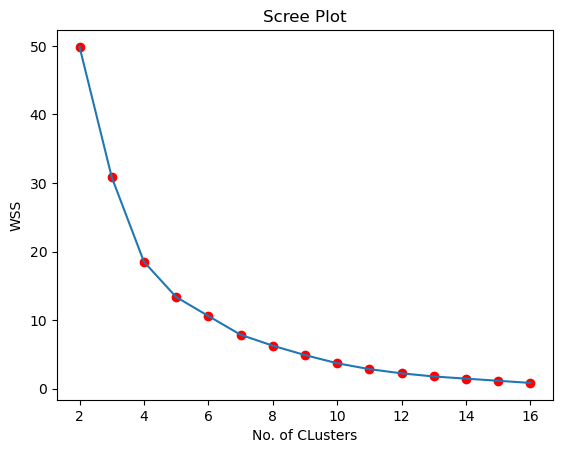

In [9]:
##### WSS

clust = KMeans(n_clusters=2)
clust.fit(milkscaled)
print(clust.inertia_)



Ks = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
scores = []
for k in Ks:
    clust = KMeans(n_clusters=k)
    clust.fit(milkscaled)
    scores.append(clust.inertia_)    

plt.scatter(Ks, scores, c='red')
plt.plot(Ks, scores)
plt.xlabel("No. of CLusters")
plt.ylabel("WSS")
plt.title("Scree Plot")
plt.show()

/Users/darshmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/darshmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/darshmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/darshmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

49.85465950736454


/Users/darshmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/darshmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/darshmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/darshmac/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

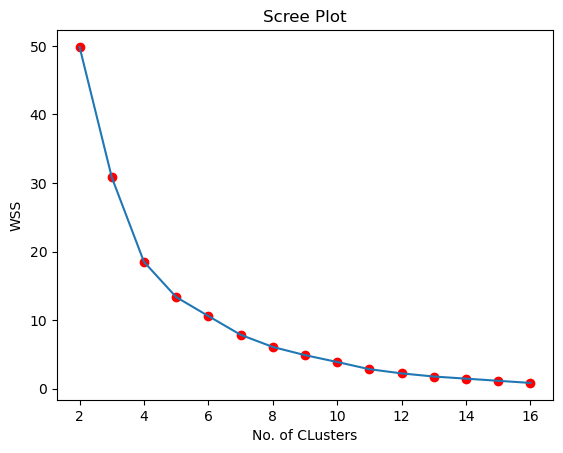

FileNotFoundError: [Errno 2] No such file or directory: 'USArrests.csv'

In [8]:
################ USArrests ######################
usa = pd.read_csv("USArrests.csv", index_col=0)
usa_scaled = scaler.fit_transform(usa)


Ks = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
scores = []
for k in Ks:
    clust = KMeans(n_clusters=k)
    clust.fit(usa_scaled)
    scores.append(clust.inertia_)    

plt.scatter(Ks, scores, c='red')
plt.plot(Ks, scores)
plt.xlabel("No. of CLusters")
plt.ylabel("WSS")
plt.title("Scree Plot")
plt.show()